In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utilities import pasar_a_datetime
import os 
import numpy as np

## Wikipedia Surveys

In [2]:
# Change this path to run in your machine
home_path = 'C:/Users/54911/OneDrive/Documentos/git_repos/elecciones2023-arg'

In [3]:
os.chdir(home_path)

In [4]:
primera_vuelta = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/Survey_primera_vuelta.csv')
ballojate = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/Survey_ballotage.csv')

'Inicio' : survey's start date

'Final' : survey's end date

In [5]:
ballojate['Inicio'] = ballojate['Inicio'].map(lambda x:pasar_a_datetime(x))
ballojate['Final'] = ballojate['Final'].map(lambda x:pasar_a_datetime(x))
primera_vuelta['Inicio'] = primera_vuelta['Inicio'].map(lambda x:pasar_a_datetime(x))
primera_vuelta['Final'] = primera_vuelta['Final'].map(lambda x:pasar_a_datetime(x))

In [6]:
parties_ballotage = ballojate.columns[4:6]
parties_primera_vuelta = primera_vuelta.columns[4:9]

## Ploting time series

Text(0, 0.5, 'Percentage')

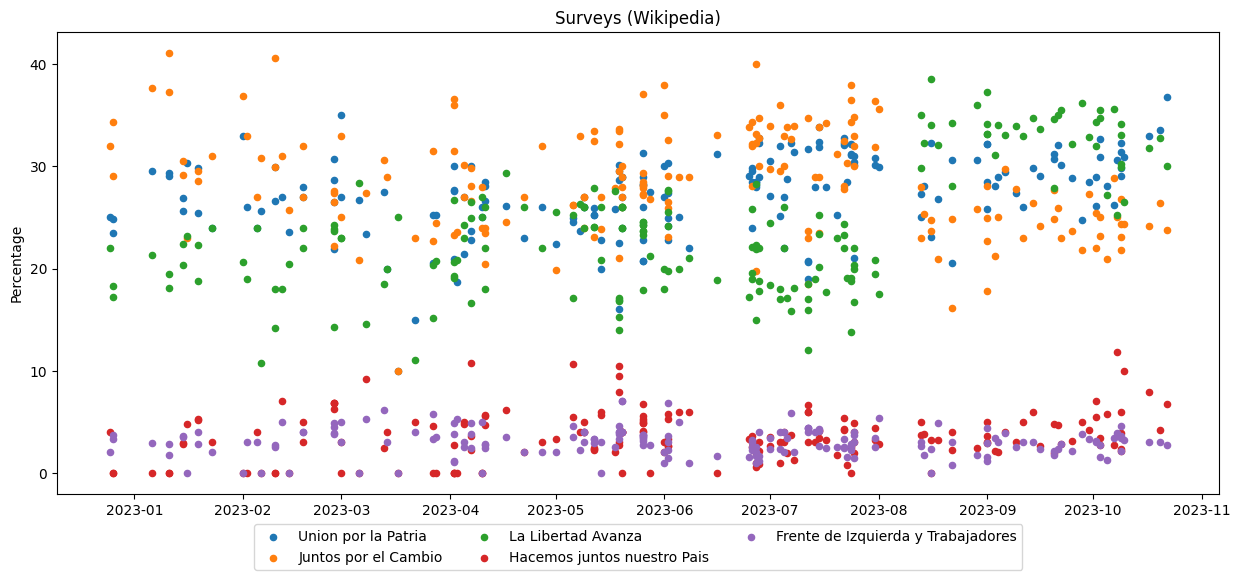

In [7]:
plt.figure(figsize=(15,6))
for p in parties_primera_vuelta:
    plt.scatter(primera_vuelta['Inicio'],primera_vuelta[p],label = p,s=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
plt.title('Surveys (Wikipedia)')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentaje')

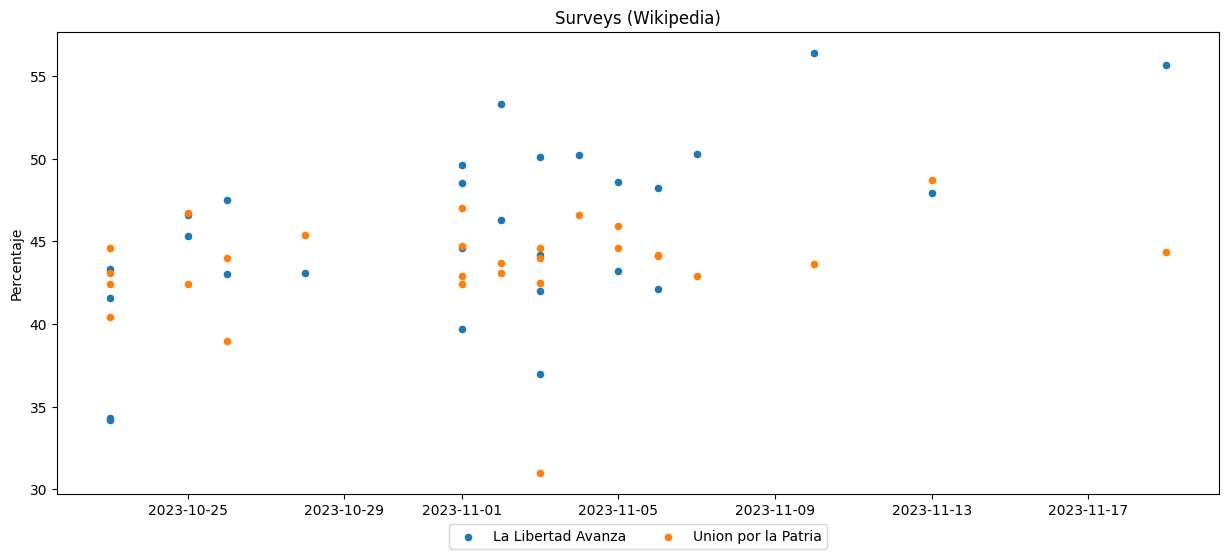

In [8]:
plt.figure(figsize=(15,6))
for p in parties_ballotage:
    plt.scatter(ballojate['Inicio'],ballojate[p],label = p,s=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
plt.title('Surveys (Wikipedia)')
plt.ylabel('Percentaje')

## Inspecting data

'Muestra' : amount of people that have been interviewed

In [9]:
upper_bound = primera_vuelta['Muestra']<primera_vuelta['Muestra'].quantile(0.95)
lower_bound = primera_vuelta['Muestra']>primera_vuelta['Muestra'].quantile(0.05)
filtered_outliers = primera_vuelta[lower_bound & upper_bound]
lost_percent = round(100*(len(primera_vuelta)-len(filtered_outliers))/len(primera_vuelta),2)
print('It was lost ',lost_percent,' % of the original data')

It was lost  13.59  % of the original data


Text(0.5, 1.0, 'Primera vuelta')

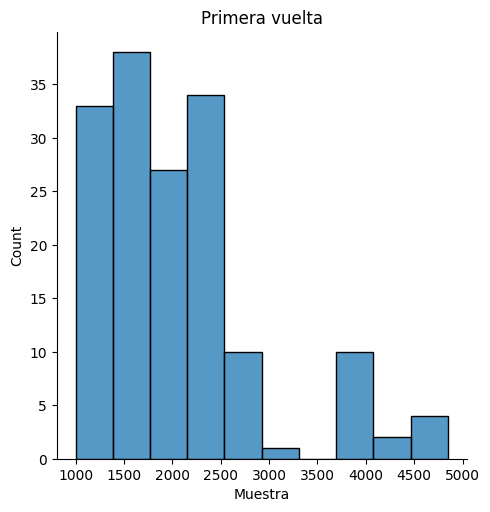

In [10]:
sns.displot(data=filtered_outliers,x='Muestra')
plt.title('Primera vuelta')

In [11]:
upper_bound = ballojate['Muestra']<ballojate['Muestra'].quantile(0.95)
lower_bound = ballojate['Muestra']>ballojate['Muestra'].quantile(0.05)
filtered_outliers = ballojate[lower_bound & upper_bound]
lost_percent = round(100*(len(ballojate)-len(filtered_outliers))/len(ballojate),2)
print('It was lost ',lost_percent,' % of the original data')

It was lost  14.29  % of the original data


Text(0.5, 1.0, 'Ballotage')

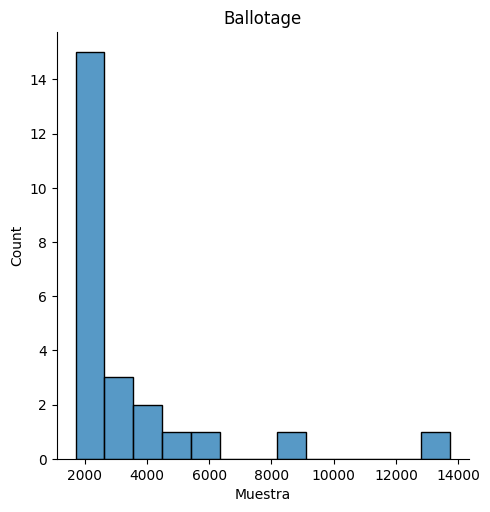

In [12]:
sns.displot(data=filtered_outliers,x='Muestra')
plt.title('Ballotage')

Values expresses in percentage

'Blanco': Blank vote

'Indecisos': indecisive

In [13]:
careless = primera_vuelta['Blanco'] + primera_vuelta['Indecisos']

In [14]:
upper_bound = careless<careless.quantile(0.90)
filtered_outliers = careless[upper_bound]
lost_percent = round(100*(len(careless)-len(filtered_outliers))/len(careless),2)
print('It was lost ',lost_percent,' % of the original data')

It was lost  10.33  % of the original data


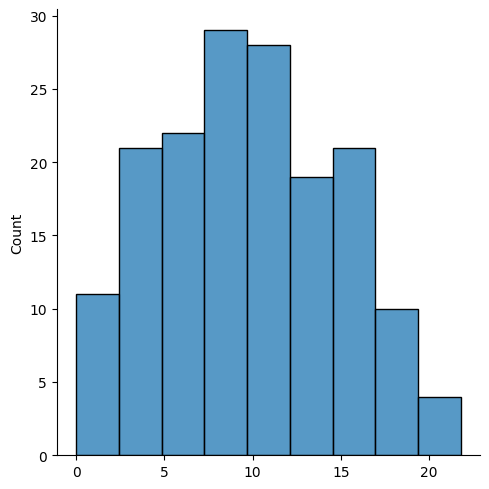

In [15]:
sns.displot(filtered_outliers)

In [16]:
careless = ballojate['Blanco'] + ballojate['Indecisos']

In [17]:
upper_bound = careless<careless.quantile(0.90)
filtered_outliers = careless[upper_bound]
lost_percent = round(100*(len(careless)-len(filtered_outliers))/len(careless),2)
print('It was lost ',lost_percent,' % of the original data')

It was lost  10.71  % of the original data


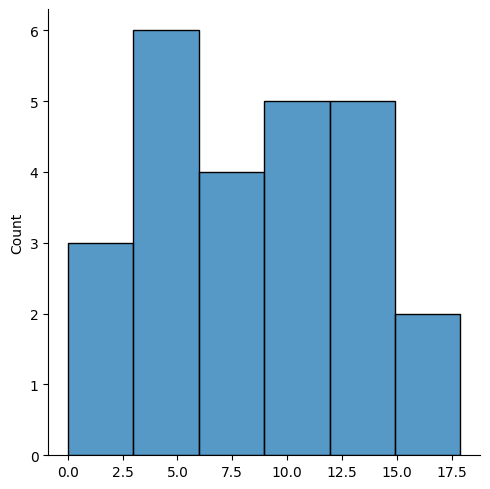

In [18]:
sns.displot(filtered_outliers)

(Check cleaning_df.py for more details)

## Plotting clean data

Lest's plot the porcentage's sum of the parties values


In [21]:
primera_vuelta_clean = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/primera_vuelta_cleaned.csv')
ballojate_clean = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/ballotage_cleaned.csv')

(array([ 1.,  1.,  0.,  1.,  1.,  3.,  8.,  6., 10., 10., 16., 14., 15.,
        11., 14.,  9.,  6.,  8.,  0.,  6.]),
 array([ 69.7 ,  71.22,  72.74,  74.26,  75.78,  77.3 ,  78.82,  80.34,
         81.86,  83.38,  84.9 ,  86.42,  87.94,  89.46,  90.98,  92.5 ,
         94.02,  95.54,  97.06,  98.58, 100.1 ]),
 <BarContainer object of 20 artists>)

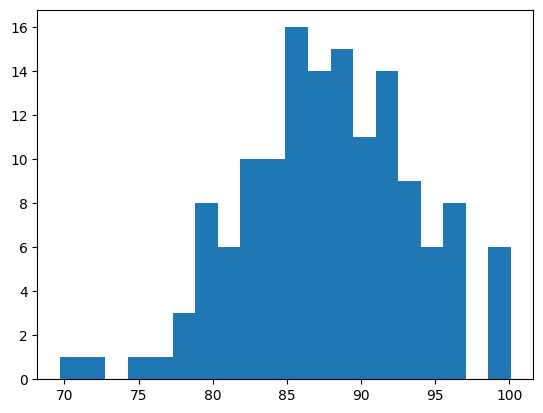

In [22]:
total_percentages = np.zeros(len(primera_vuelta_clean))
for i in range(len(primera_vuelta_clean)):
    values = primera_vuelta_clean[parties_primera_vuelta].iloc[i].values
    total_percentages[i] = sum(values)
plt.hist(total_percentages,bins=20)

Need to be normalize the percentage values sum(values) = 100%

(Check normalizing.py)

## Polynomial Adjust

(With normalize data)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [42]:
primera_vuelta = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/normalize_primera_vuelta.csv')
ballotage = pd.read_csv('Elecciones + IA/getting_data/surveys/data_scraped/normalize_ballotage.csv')

In [43]:
parties_primera_vuelta = primera_vuelta.columns[0:5]
parties_ballotage = ballotage.columns[0:2]

In [44]:
primera_vuelta['Inicio'] = primera_vuelta['Inicio'].map(lambda x:pasar_a_datetime(x))
primera_vuelta['Final'] = primera_vuelta['Final'].map(lambda x:pasar_a_datetime(x))
ballotage['Inicio'] = ballotage['Inicio'].map(lambda x:pasar_a_datetime(x))
ballotage['Final'] = ballotage['Final'].map(lambda x:pasar_a_datetime(x))

In [45]:
primera_vuelta_clean_grouped = primera_vuelta.groupby(by=['Inicio','Final'])[parties_primera_vuelta].mean().reset_index()
ballojate_clean_grouped = ballotage.groupby(by=['Inicio','Final'])[parties_ballotage].mean().reset_index()

Text(0, 0.5, 'Porcentaje')

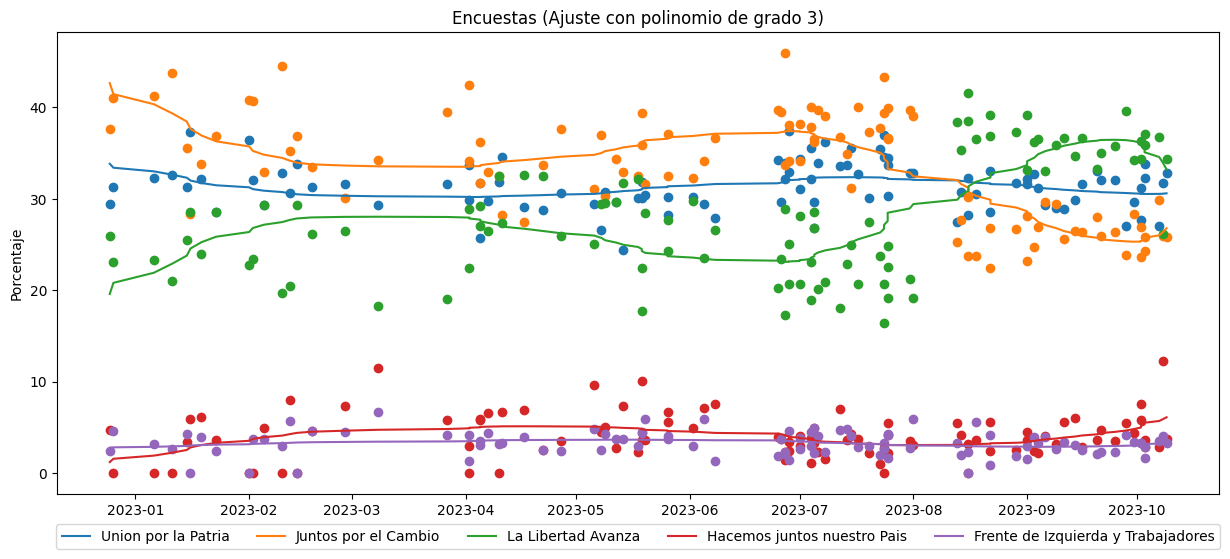

In [50]:
degree = 4
surveys_poly_party = []
axis_x = np.arange(len(primera_vuelta_clean_grouped))
plt.figure(figsize=(15,6))

#need to be add subplots
fechas = primera_vuelta_clean_grouped['Inicio']
for party in parties_primera_vuelta:
    
    poly_reg_model = LinearRegression()
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(axis_x.reshape(-1, 1))

    y = primera_vuelta_clean_grouped[party].to_numpy()
    poly_reg_model.fit(poly_features, y)
    #X_=np.linspace(axis_x.min(), axis_x.max(), 200).reshape(-1, 1)
    Y_=poly_reg_model.predict(poly_features)

    surveys_poly_party.append(Y_)
    
    plt.plot(fechas, Y_,label=party)
    plt.scatter(fechas,primera_vuelta_clean_grouped[party])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=5)
plt.title('Encuestas (Ajuste con polinomio de grado 3)')
plt.ylabel('Porcentaje')